(HW) Case 2: Gaussian-Gaussian (unknown mu)

ESC : Ilchan Ju

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

Case 2: Gaussian-Gaussian (unknown mu)

In [2]:
from scipy.stats import norm
import math

1) Sampling Density

In [3]:
# population parameter
mu, sigma = 21, 2

# generate toy sample
N = 1000
np.random.seed(101)
data = norm.rvs(mu, sigma, size=N)
print(data)
xbar=np.mean(data)
lmda = 1/np.std(data)
print(data.size)
print(data.sum())
print(xbar)
print(lmda)

[26.414 22.256 22.816 22.008 22.302 20.361 19.304 22.212 16.964 22.48
 22.058 19.822 21.377 19.482 19.134 22.91  21.382 24.958 26.212 22.367
 21.605 24.387 17.588 18.682 20.73  21.781 21.334 21.369 22.615 21.146
 22.278 21.659 20.006 19.492 19.113 21.97  20.766 24.804 21.476 24.993
 19.013 21.394 18.727 21.001 23.052 20.687 20.937 22.3   25.31  19.779
 19.489 20.307 21.294 20.041 22.118 23.05  19.148 24.726 18.732 22.221
 21.772 25.168 20.247 21.461 22.362 23.07  20.938 24.88  18.99  19.516
 21.374 19.534 18.234 23.965 22.923 16.718 22.985 23.384 18.906 23.586
 18.065 20.012 20.675 21.972 21.785 21.443 19.29  24.084 22.333 19.924
 19.863 23.815 22.284 19.19  20.218 23.057 17.055 19.266 22.442 18.554
 24.214 18.769 18.229 18.341 21.083 20.178 19.457 21.221 19.391 21.507
 22.298 21.718 18.839 22.805 21.324 22.666 22.951 20.224 22.567 19.582
 22.174 17.757 22.355 21.052 17.643 21.668 19.935 25.235 21.395 25.606
 22.458 19.274 21.611 21.486 22.728 17.878 20.496 19.844 21.474 21.402
 21.656

2) Prior Belief

Prior belief can be in any form (flat, peaked, skewed, bimodal...) as long as the belief satistifies the fundamental axioms of probability. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated.

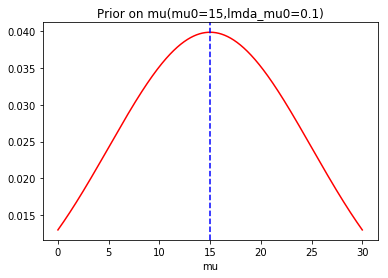

In [4]:
# Choose your own belief parameters
mu0, lmda_mu0 = 15, 0.1
PB = norm(loc=mu0, scale=1/lmda_mu0)
prior_x = np.linspace(0, 30, 1000)
plt.plot(prior_x, PB.pdf(prior_x), 'r')
plt.title("Prior on mu(mu0=15,lmda_mu0=0.1)")
plt.xlabel("mu")
plt.axvline(15, color = 'b', linestyle = '--')

3) Likelihood (Sampling Density)

Once you have specified your belief, you need to consider "how likely" the data is at each point of p. What you would really come in handy is a plot where every possible choice of p is on x-axis and the y-axis shows "how likely the data came from that choice of p. Likelihood does exactly this.

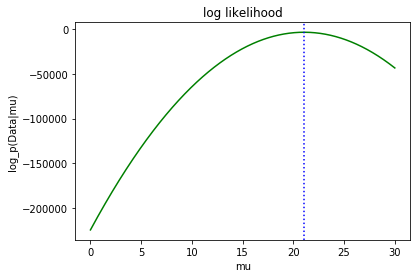

In [6]:
# Define likelihood
def likelihood(x, mu):
    a = 0 
    for i in x:
        a += np.log(norm.pdf(i, mu, 1))
    return a

plt.plot(prior_x, likelihood(data, prior_x), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.axvline(xbar, color = 'b', linestyle = ':')

4) Posterior: Updated Belief

The posterior is defined by strictly applying Bayes Rule; p(θ|D)= p(θ)p(D|θ)/∫p(θ)p(D|θ)dθ. This is in most cases analytically intractable, but in this case where we have a conjugacy between the belief distribution and the sampling distribution, this simply reduces to updating belief paratemers; a, b. Otherwise we have to approximate p(θ|D) or use numerical methods, such as MCMC.

Text(0.5, 0, 'mu')

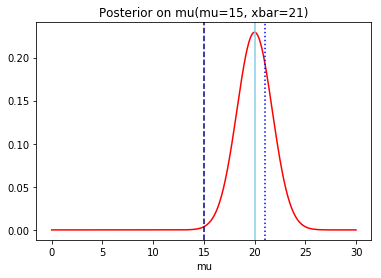

In [7]:
# Posterior distribution (Evidences(Data) are given)

# lmda updated
lmda_mu_pos = lmda_mu0 + lmda

# mu updated(sigma : fixed, lmda = 1/std)
mu_pos = (mu0 * lmda_mu0 + xbar * lmda)/lmda_mu_pos

posterior = norm(loc=mu_pos, scale=1/lmda_mu_pos)

post_x = np.linspace(0, 30, 1000)
plt.plot(post_x, posterior.pdf(post_x), 'r')
plt.axvline(15, color = 'darkblue', linestyle = '--')
plt.axvline(mu_pos, color = 'skyblue')
plt.axvline(xbar, color = 'b', linestyle = ':')
plt.title("Posterior on mu(mu=15, xbar=21)")
plt.xlabel("mu")

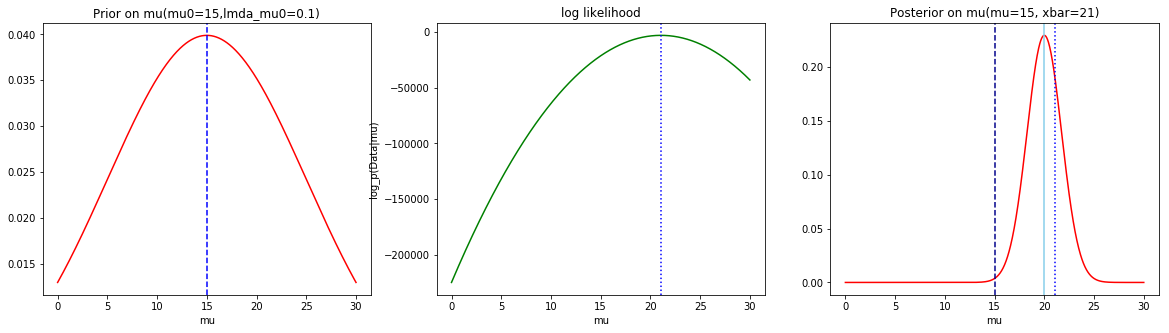

In [8]:
# in a nutshell;
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(prior_x, PB.pdf(prior_x), 'r')
ax1.set_title('Prior on mu(mu0=15,lmda_mu0=0.1)')
ax1.set_xlabel('mu')
ax1.axvline(15, color = 'b', linestyle = '--')

ax2 = fig.add_subplot(132)
ax2.plot(prior_x, likelihood(data, prior_x), color='g')
ax2.set_title('log likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel("log_p(Data|mu)")
ax2.axvline(xbar, color = 'b', linestyle = ':')

ax3 = fig.add_subplot(133)
ax3.plot(post_x, posterior.pdf(post_x), 'r')
ax3.set_title('Posterior on mu(mu=15, xbar=21)')
ax3.set_xlabel('mu')
ax3.axvline(15, color = 'darkblue', linestyle = '--')
ax3.axvline(mu_pos, color = 'skyblue')
ax3.axvline(xbar, color = 'b', linestyle = ':')